In [1]:
! rm -rf tools_classifier
! git clone https://github.com/zRafaF/tools_classifier

Cloning into 'tools_classifier'...
remote: Enumerating objects: 343, done.
remote: Total 343 (delta 0), reused 0 (delta 0), pack-reused 343 (from 1)
Receiving objects: 100% (343/343), 125.05 MiB | 37.73 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [3]:
DATA_SET_PATH = './tools_classifier/data_set/c_r_a_g_png'

# Equalizando histograma

Baseado na resposta [OpenCV Python equalizeHist colored image](https://stackoverflow.com/questions/31998428/opencv-python-equalizehist-colored-image)

In [4]:
def equalize_histogram(image):
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    return img_output

Testando resultado

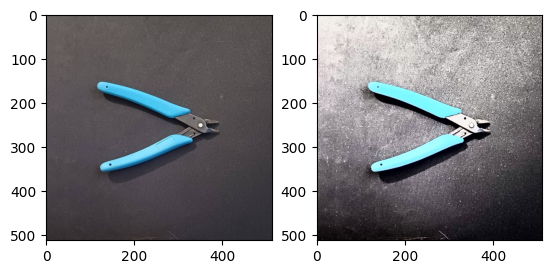

In [5]:
test_img = io.imread(os.path.join(DATA_SET_PATH, "cutting_pliers", "2-01-V1-B.png"))
equalized_test_img = equalize_histogram(test_img)

plt.subplot(1, 2, 1)
plt.imshow(test_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(equalized_test_img, cmap='gray')

# Criando o dataset equalizado


In [6]:
new_path = './equalized_data_set'
if not os.path.exists(new_path):
    os.makedirs(new_path)

for dir in os.listdir(DATA_SET_PATH):
    images_in_class = []
    data_set_dir = os.path.join(DATA_SET_PATH, dir)
    equalized_data_set_dir = os.path.join(new_path, dir)
    if not os.path.exists(equalized_data_set_dir):
      os.makedirs(equalized_data_set_dir)

    for filename in os.listdir(data_set_dir):
      if filename.endswith('.png'):
          img_path = os.path.join(data_set_dir, filename)
          image = io.imread(img_path)
          images_in_class.append({
              "name": filename,
              "image": image
          })
    for image in images_in_class:
      equalized_image = equalize_histogram(image["image"])

      splitted = image["name"].split(".")[0].split("-")

      img_dict = {
          "classid": splitted[0],
          "img_sequence": splitted[1],
          "V1|V2": splitted[2],
          "B|W": splitted[3],
      }

      equalized_img_name = img_dict["classid"] + '-' + img_dict["img_sequence"] + '-' + img_dict["V1|V2"] + "-" + img_dict["B|W"] + ".png"
      print(equalized_img_name)
      io.imsave(
          os.path.join(
              equalized_data_set_dir,
              equalized_img_name),
          equalized_image)


9-01-V1-W.png
9-01-V2-W.png
9-01-V1-B.png
9-02-V1-B.png
9-04-V2-W.png
9-04-V1-B.png
9-03-V2-W.png
9-04-V2-B.png
9-03-V1-W.png
9-02-V2-W.png
9-03-V1-B.png
9-02-V1-W.png
9-04-V1-W.png
9-02-V2-B.png
9-03-V2-B.png
9-01-V2-B.png
6-03-V1-B.png
6-04-V1-B.png
6-01-V1-W.png
6-02-V1-B.png
6-01-V1-B.png
6-02-V2-W.png
6-03-V2-B.png
6-01-V2-B.png
6-03-V2-W.png
6-04-V1-W.png
6-02-V1-W.png
6-02-V2-B.png
6-03-V1-W.png
6-04-V2-W.png
6-04-V2-B.png
6-01-V2-W.png
2-01-V1-B.png
2-01-V2-B.png
2-03-V2-W.png
2-04-V2-B.png
2-02-V2-B.png
2-01-V2-W.png
2-03-V1-W.png
2-02-V1-W.png
2-04-V1-B.png
2-02-V2-W.png
2-03-V2-B.png
2-04-V2-W.png
2-01-V1-W.png
2-02-V1-B.png
2-04-V1-W.png
2-03-V1-B.png
1-02-V1-W.png
1-02-V2-B.png
1-04-V1-B.png
1-01-V2-W.png
1-02-V1-B.png
1-03-V1-W.png
1-03-V2-W.png
1-03-V1-B.png
1-01-V1-W.png
1-01-V1-B.png
1-04-V2-W.png
1-04-V1-W.png
1-03-V2-B.png
1-02-V2-W.png
1-01-V2-B.png
1-04-V2-B.png
5-03-V2-B.png
5-01-V2-W.png
5-02-V2-B.png
5-02-V1-B.png
5-04-V1-W.png
5-01-V1-W.png
5-03-V1-B.png
5-04-V

In [7]:
!zip -r equalized_data_set.zip equalized_data_set/

  adding: equalized_data_set/ (stored 0%)
  adding: equalized_data_set/wrench/ (stored 0%)
  adding: equalized_data_set/wrench/9-01-V1-W.png (deflated 0%)
  adding: equalized_data_set/wrench/9-01-V2-W.png (deflated 0%)
  adding: equalized_data_set/wrench/9-01-V1-B.png (deflated 2%)
  adding: equalized_data_set/wrench/9-02-V1-B.png (deflated 0%)
  adding: equalized_data_set/wrench/9-04-V2-W.png (deflated 0%)
  adding: equalized_data_set/wrench/9-04-V1-B.png (deflated 0%)
  adding: equalized_data_set/wrench/9-03-V2-W.png (deflated 0%)
  adding: equalized_data_set/wrench/9-04-V2-B.png (deflated 0%)
  adding: equalized_data_set/wrench/9-03-V1-W.png (deflated 0%)
  adding: equalized_data_set/wrench/9-02-V2-W.png (deflated 0%)
  adding: equalized_data_set/wrench/9-03-V1-B.png (deflated 0%)
  adding: equalized_data_set/wrench/9-02-V1-W.png (deflated 0%)
  adding: equalized_data_set/wrench/9-04-V1-W.png (deflated 0%)
  adding: equalized_data_set/wrench/9-02-V2-B.png (deflated 0%)
  adding: equ